In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/PCB defect detection'

darknet  images  pcb_def_det.ipynb


In [ ]:
!unzip '/content/drive/My Drive/PCB defect detection/images/dataset.zip' -d '/content/drive/My Drive/PCB defect detection/'

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/My Drive/PCB defect detection/darknet'

Cloning into '/content/drive/My Drive/PCB defect detection/darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.70 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (10402/10402), done.
Checking out files: 100% (2044/2044), done.


In [ ]:
%cd '/content/drive/My Drive/PCB defect detection/darknet'
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/My Drive/PCB defect detection/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!make

In [ ]:
%cd '/content/drive/My Drive/PCB defect detection/darknet'

/content/drive/My Drive/PCB defect detection/darknet


In [ ]:
!python generate_train.py

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-09-25 15:06:41--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-09-25 15:06:41--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  19.6MB/s    in 8.8s    

2021-09-25 15:06:50 (17.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
%cd '/content/drive/My Drive/PCB defect detection/darknet'

/content/drive/My Drive/PCB defect detection/darknet


In [ ]:
!chmod +x ./darknet

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
!./darknet detector train data/custom.data cfg/yolov3-tiny-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 3792265, rewritten_bbox = 0.034808 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.602827), count: 2, class_loss = 0.031211, iou_loss = 0.010840, total_loss = 0.042051 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.813856), count: 153, class_loss = 0.598740, iou_loss = 0.392840, total_loss = 0.991580 
 total_bbox = 3792420, rewritten_bbox = 0.034806 % 

 11446: 0.536514, 0.624497 avg loss, 0.000010 rate, 1.110977 seconds, 732544 images, 0.203128 hours left
Loaded: 0.000068 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.584751), count: 3, class_loss = 0.076907, iou_loss = 0.109787, total_loss = 0.186694 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.800633), count: 154, class_loss = 0.900266, iou_loss = 0.473061, total_loss = 1.373327 
 total_bbox = 3792577, rewritten_bbox 

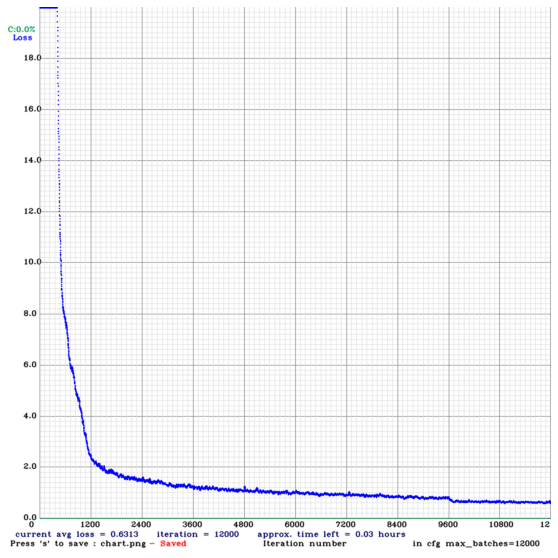

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

imShow('chart.png')

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/drive/My Drive/PCB defect detection/darknet/cfg
/content/drive/My Drive/PCB defect detection/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256   

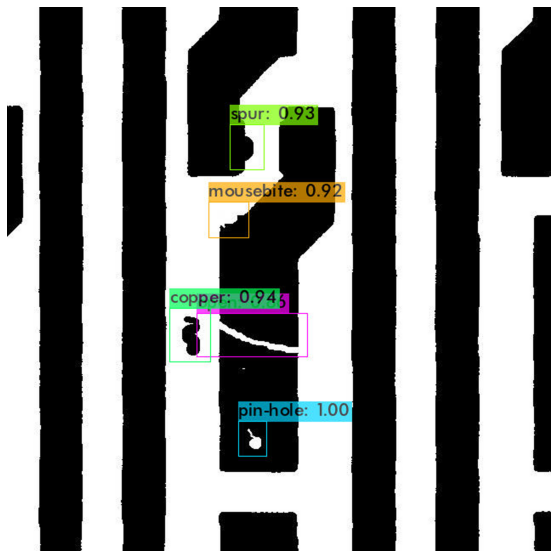

In [ ]:
!./darknet detector test data/custom.data cfg/yolov3-tiny-custom.cfg /mydrive/modelbackup/yolov3-tiny-custom_last.weights /mydrive/pred2.jpg -thresh 0.3
imShow('predictions.jpg')